[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tuankhoin/COMP30027-Practical-Solutions/blob/main/2022/Week%206.ipynb)

## Shameless PR: UniMelb Rover Team 💪
Build a vehicle that explores the moon surface.

<img src='https://github.com/tuankhoin/COMP30027-Practical-Solutions/blob/main/rover.jpg?raw=true' width=400>

### The pros:
- Uni might pay for your trip to Adelaide.
- First time joining Australian Rover Challenge, we were runner-up. We can only go up from here!
- Get on the beers 🍺! The team is very chill.
- You might find some of your engineering subjects' tutors there.

### The cons:
- You'll probably see me more often there, swearing more frequent.



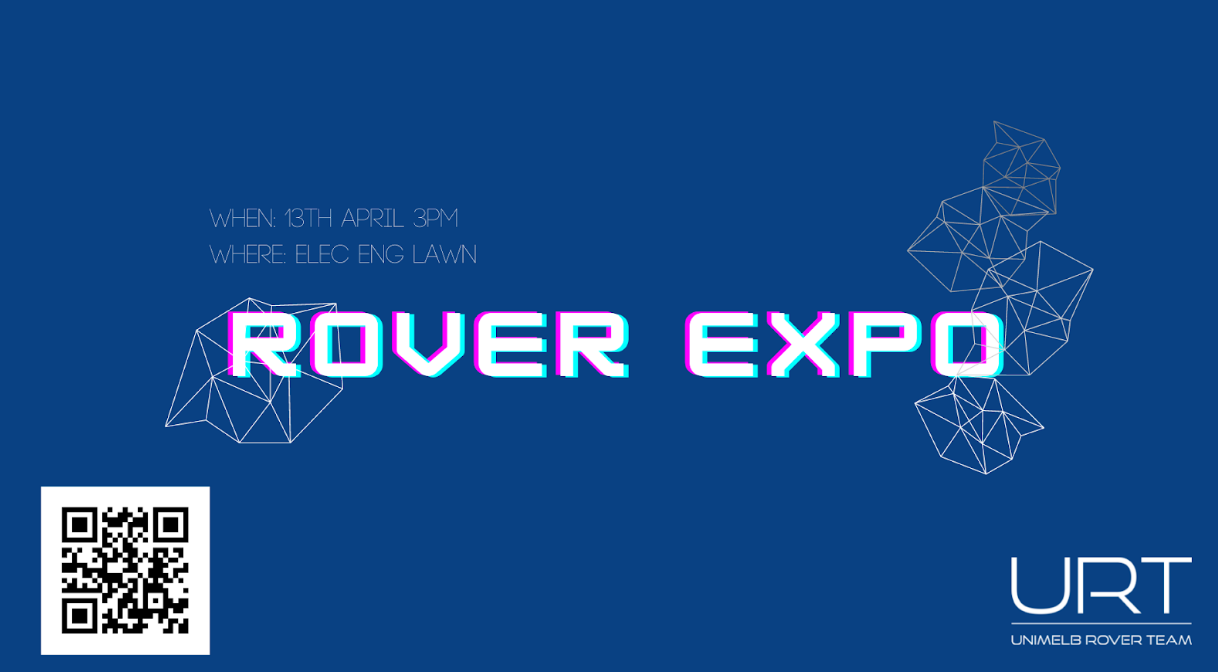

### Also:
Friday class is off next week (Good Friday).
Alternatives:
- Wednesday 2:15pm (B131 207-221 Bouverie St)
- Thursday 4:15pm (B131 207-221 Bouverie St)
- Friday 10:00am (somewhere along the Gippsland hills, if you can find me)
- Online sesh on Zoom (See Canvas 'Zoom' tab for the details)

###### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2022 Semester 1

## Week 6 - Support Vector Machine

Today, we will be examining the behaviour of some **Support Vector Machine classifiers.**

To do so, we are using the `IRIS` dataset again.


In [ ]:
import numpy as np
from sklearn import datasets, svm
import matplotlib.pyplot as plt

iris = datasets.load_iris()

### Exercise 1. 
By only considering the first 2 features of this dataset (`'Sepal length'` and `'Sepal width'`) create a 2D projection of the iris dataset.

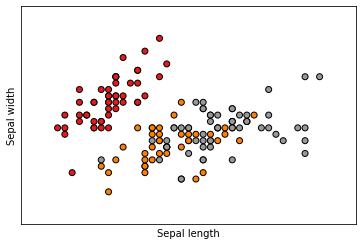

In [ ]:

# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target


x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.show()

(1.5, 4.9)

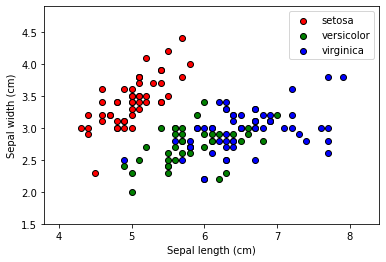

In [ ]:
X_0, X_1, X_2 = X[y==0], X[y==1], X[y==2]
plt.scatter(X_0[:,0], X_0[:,1], c='r', cmap=plt.cm.Set1, edgecolor='k', label=iris.target_names[0])
plt.scatter(X_1[:,0], X_1[:,1], c='g', cmap=plt.cm.Set1, edgecolor='k', label=iris.target_names[1])
plt.scatter(X_2[:,0], X_2[:,1], c='b', cmap=plt.cm.Set1, edgecolor='k', label=iris.target_names[2])

plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend()

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

#### Exercise 1. (a)
The following code shows how to plot the decision surface for four SVM classifiers with different kernels:
        
   * `LinearSVC()`                        : Linear SVM
   * `SVC(kernel='linear')`               : SVM with linear Kernel
   * `SVC(kernel='rbf', gamma = 0.7, C=1)`     : SVM with Radial Basis Function (RBF) kernel
   * `SVC(kernel='poly', degree = 3, C=1)`     : SVM with Polynomial Kernel
        
Examine the visualisations of the four different SVMs, paying close attention to the decision boundaries. Which do you think has the best expressitivity, based on the two–dimensional slice shown?
    
**Note:** Explaining the insight behind the kernels' hyper-parameters (e.g. $\gamma$ (gamma) as 'smoothing factor') is out of scope of this subject. 

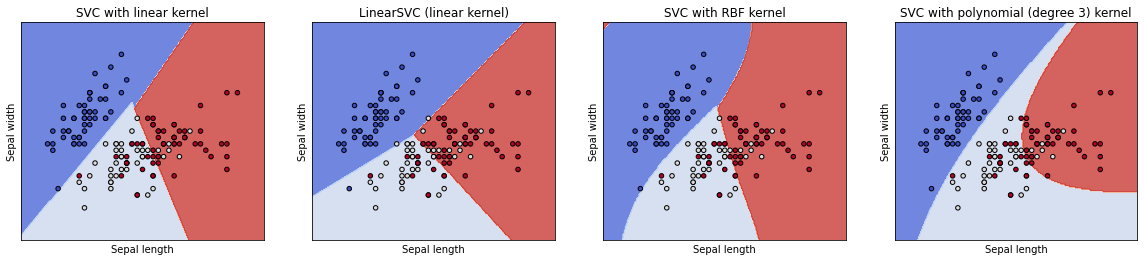

In [ ]:
# Derived from the scikit-learn documentation example from:
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))

models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(1, 4, figsize=(20,4))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

Factos: [`LinearSVC` vs. `SVC('linear')`](https://stackoverflow.com/questions/35076586/when-should-one-use-linearsvc-or-svc) They are not the same!

*Well, this is largely a matter of perspective. However, based solely on the information given, the straight-line boundaries of the linear-kernel SVMs appear to be slightly too simple for this dataset.*


#### Exercise 1. (b)
Lets use another pair of attributes from the Iris dataset (`'petal length'` and `'petal width'`) to create a differnt 2D projection of the iris dataset. 


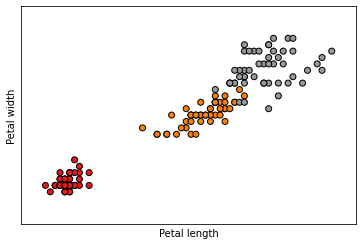

In [ ]:
# petal length and petal width are the final two attributes.
X = iris.data[:, 2:]
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Petal length')
plt.ylabel('Petal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.show()

   Examine the visualisation of the four SVM models on this new mapping. What is your conclusion comparing results from part (a) and part (b) graphs?

(-0.4, 3.0)

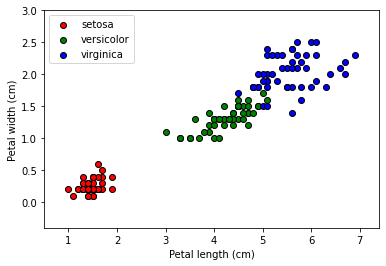

In [ ]:
X_0, X_1, X_2 = X[y==0], X[y==1], X[y==2]
plt.scatter(X_0[:,0], X_0[:,1], c='r', cmap=plt.cm.Set1, edgecolor='k', label=iris.target_names[0])
plt.scatter(X_1[:,0], X_1[:,1], c='g', cmap=plt.cm.Set1, edgecolor='k', label=iris.target_names[1])
plt.scatter(X_2[:,0], X_2[:,1], c='b', cmap=plt.cm.Set1, edgecolor='k', label=iris.target_names[2])

plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.legend()

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

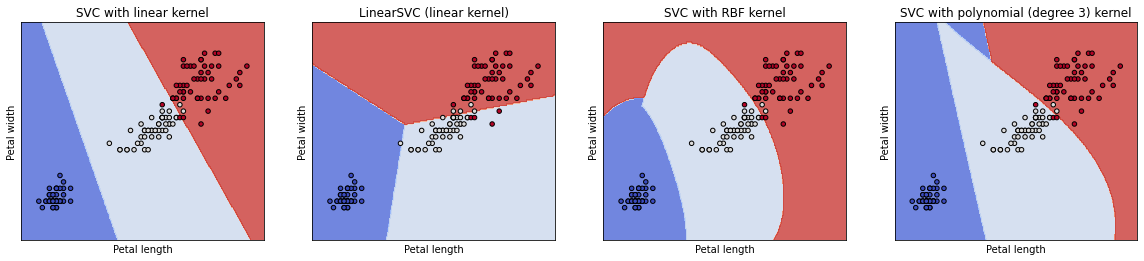

In [ ]:
# Derived from the scikit-learn documentation example from:
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))

models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')


# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(1, 4, figsize=(20,4))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Petal length')
    ax.set_ylabel('Petal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show();

##### *Answer*

*It can be observed from the results that features `'petal length'` and `'petal width'` are better (make less mistakes) for building the SVM model. In another word, these two features contain more information about our classes (more correlated with the class labels) in compare with the earlier pair of features we used (`'Sepal length'` and `'Sepal width'`).*

#### Exercise 1. (c)
The default value of the $C$ parameter (the “penalty” for mis-classified examples OR the 'regularisation factor') is 1. Increase (or decrease) this value and observe how the decision boundaries change.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


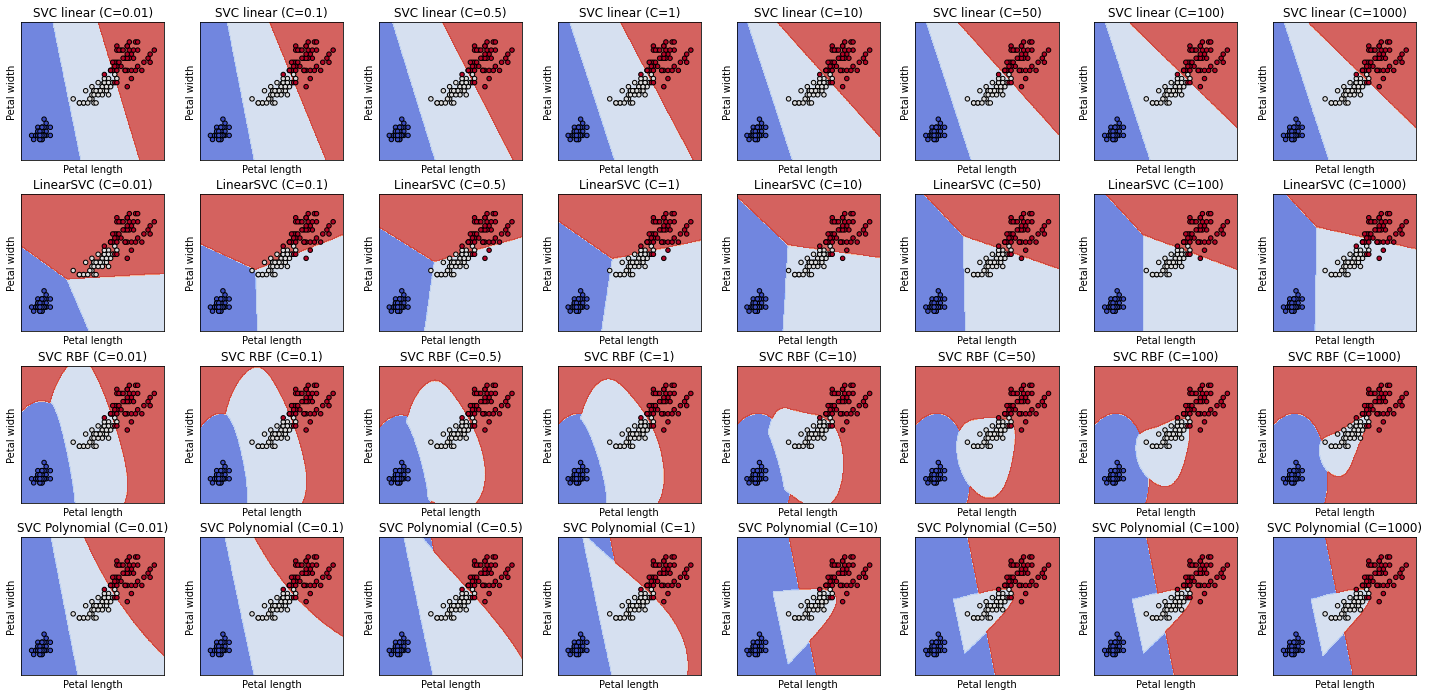

In [ ]:
Cs = [0.01,0.1,0.5,1,10,50,100,1000]
# Set-up grid for plotting.
fig, sub = plt.subplots(4,len(Cs), figsize=(25,12))
plt.subplots_adjust(wspace=0.25, hspace=0.25)

for i,C in enumerate(Cs):
    models = (svm.SVC(kernel='linear', C=C),
              svm.LinearSVC(C=C, max_iter=10000),
              svm.SVC(kernel='rbf', gamma=0.7, C=C),
              svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))

    models = (clf.fit(X, y) for clf in models)

    # title for the plots
    titles = (f'SVC linear (C={C})',
              f'LinearSVC (C={C})',
              f'SVC RBF (C={C})',
              f'SVC Polynomial (C={C})')
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    for clf, title, ax in zip(models, titles, sub[:,i].flatten()):
        plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel('Petal length')
        ax.set_ylabel('Petal width')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

plt.show();

##### *Answer*

```
tl;dr: High C = Overfit (Hard margin), Low C = Underfit
```

*Higher C means a higher penalty for misclassification (harder margins), so we'll have narrower margines and more complex/expressive decision boundaries that might work very well for the training data, but might not work well (generalise) for the test data, which can leads to overfitting.*

*We can observe this by calculating accuracy on using holdout or cross-validation.*

##### *optional complementory answer* 
Here $C$ controls the tradeoff between margin maximization and correct classification. Recall the primal, constrained problem:

$$
\min_{\mathbf{w},\xi} \frac{1}{2} \Vert \mathbf{w} \Vert^2 + C \sum_{i=1}^N \xi_i^p \quad \text{subject to} \; y_i (\langle w, \mathbf{x}_i \rangle + b) \geq 1 - \xi_i, \; \xi_i \geq 0
$$

What are the $\xi_i$? We've relaxed the problem from perfect hyperplane separation, $y_i (\langle \mathbf{x}_i,\mathbf{w}\rangle) \geq 1$, to permitting a violation of the margin by the slack variable $\xi_i \geq 0$.

Introduce Lagrange multipliers $\lambda_i$, $\alpha_i$ for each respective inequality constraint ($N$ of them) to pass from constrained to unconstrained form:

$$
\mathcal{L}(\mathbf{w}) = \frac{1}{2} \Vert \mathbf{w} \Vert^2 + C \sum_{i=1}^N \xi_i^p - \sum_{i=1}^N \lambda_i \left(y_i (\langle w, \mathbf{x}_i \rangle + b - 1+ \xi_i )\right) - \sum_i \alpha_i \xi_i 
$$

Obtain KKT conditions by optimality conditions of the Lagrangian $\mathcal{L}$. The most important KKT condition is from the first optimality condition, $\frac{\partial \mathcal{L}}{\partial \mathbf{w}} = 0$, this tells us $\mathbf{w} = \sum_i \lambda_i y_i \mathbf{x}_i$. i.e. the hyperplane is defined by a linear combination of the training vectors. A secondary optimality condition tells us that $\lambda_i = 0$ except for the support vectors, so we have a sparse representation of the hyperplane.

substitute these conditions into the primal form to obtain the dual form. This is typically what software packages optimize over.

$$
\mathcal{L} = \sum_{i=1}^N\lambda_i - \frac{1}{2} \sum_{i,j}^N \lambda_i \lambda_j y_i y_j \color{red}{\langle \mathbf{x}_i, \mathbf{x}_j \rangle}
$$

Why? Note no inner product $\langle \mathbf{w}, \mathbf{x} \rangle$! Now only a sum over $<N$ datapoints, compared to evaluation of $D$ products, and $N \ll D$ almost always for kernelized representations. How to kernelize?

$$
\mathcal{L} = \sum_{i=1}^N\lambda_i - \frac{1}{2} \sum_{i,j}^N \lambda_i \lambda_j y_i y_j \color{red}{\mathcal{K}(\mathbf{x}_i, \mathbf{x}_j)}
$$

Where $\mathcal{K}(x_i,x_j) = \langle \phi(x_i), \phi(x_j)\rangle$ implicitly defines a high (potentially infinite) dimensional inner product. This permits our decision boundary to be a nonlinear function in the feature vectors. 

#### Exercise 1. (d)
Calculate the training accuracy of the various SVM classifiers that you graphed in part (b). Do you see any evidence that any of these classifiers might be overfitting this data?

In [ ]:
#these models are already fitted to the whole iris dataset
#Note that they are trained only on 2 out of four features.

models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))

models = (clf.fit(X, y) for clf in models)

titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

for title, model in zip(titles, models):
    acc = model.score(X, y)
    print(title, acc)

SVC with linear kernel 0.9666666666666667
LinearSVC (linear kernel) 0.94
SVC with RBF kernel 0.9666666666666667
SVC with polynomial (degree 3) kernel 0.96


### Exercise 2.
Let’s summarise some earlier work. Use all four attributes from the Iris data, and compare the training accuracy with the accuracy estimated by 10–fold (stratified) cross–validation, for the following models:

    (a) One-R
    (b) 1-Nearest Neighbour ( neighbors.KNeighborsClassifier )
    (c) 5-Nearest Neighbour
    (d) Decision Trees
    (e) LinearSVC()
    (f) SVMs with a cubic (polynomial degree 3) kernel 
    (g) SVMs with an RBF kernel

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Ok ok I know SVM isn't converging already, just shut up 
import warnings
warnings.filterwarnings('ignore', message='Liblinear failed to converge')

#print(cross_val_score(zero_r, X, y, cv=10))
X = iris.data
y = iris.target

#try to change C to 1000 or 0.001
C = 1.0  # SVM regularization parameter
models = [DecisionTreeClassifier(max_depth=1),
          KNeighborsClassifier(n_neighbors=1),
          KNeighborsClassifier(n_neighbors=5),
          DecisionTreeClassifier(max_depth=None),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C)]

titles = ['1-R',
          '1-Nearest Neighbour',
          '5-Nearest Neighbour',
          'Decision Tree',
          'LinearSVC',
          'SVM (cubic kernel)',
          'SVM (RBF kernel)']

title_training_acc = {}
for title, model in zip(titles, models):
    model.fit(X, y)
    title_training_acc[title] = model.score(X, y)

title_crossvalidation_acc = {}
for title, model in zip(titles, models):
    title_crossvalidation_acc[title] = np.mean(cross_val_score(model, X, y, cv=10))

for title in titles:
    print(f'{title}:\n -Training Acc: {title_training_acc[title]*100:.2f}%\n -X-Val Acc: {title_crossvalidation_acc[title]*100:.2f}%')
    

1-R:
 -Training Acc: 66.67%
 -X-Val Acc: 66.67%
1-Nearest Neighbour:
 -Training Acc: 100.00%
 -X-Val Acc: 96.00%
5-Nearest Neighbour:
 -Training Acc: 96.67%
 -X-Val Acc: 96.67%
Decision Tree:
 -Training Acc: 100.00%
 -X-Val Acc: 96.00%
LinearSVC:
 -Training Acc: 96.67%
 -X-Val Acc: 96.67%
SVM (cubic kernel):
 -Training Acc: 98.00%
 -X-Val Acc: 97.33%
SVM (RBF kernel):
 -Training Acc: 97.33%
 -X-Val Acc: 96.67%


```tl;dr: Today's Iris dataset is simple, so models can get correct predictions easily. Wait until you get to the real Kaggle-style datasets``` 💀 💀 💀

*Aside from 1-R (our baseline), all of these learners can build a model that predicts the data fairly well, even when it is unseen (in cross-validation). The only learners that are probably overfitting are 1-NN and the Decision Tree; this is a fairly common phenomenon, as they agressively attempt to reproduce the training data exactly. Generally though, Iris is a fairly easy problem for most of the ML models; probably because the attribute (especially related to the petals) suggest the class very strongly. As the semester continues, we'll examine some more non-trivial problems.*